# Residuals of linear solvers for set 1
## Influence of expansion ratio with and without wall functions

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

mpl.rcParams['figure.dpi'] = 160
mpl.rc('text', usetex=True)

run = "../run/"
output = "./output/"
!mkdir -p output

print("Matplolib version: ", mpl.__version__)
print("Pandas version: ", pd.__version__)
print("Numpy version: ", np.__version__)

Matplolib version:  3.3.3
Pandas version:  1.2.1
Numpy version:  1.19.5


In [2]:
names = ["t", "Usol", "Uxi", "Uxf", "Uxit", "Uyi", "Uyf", "Uyit", "Ucon", "psol", "pi", "pf", "pit", "pcon"]

wf_cases = ["set1_alpha2_iddes_spalding_g{:d}".format(i) for i in [625, 1250, 2500, 5000, 10000, 20000]]
df_cases = ["set1_alpha2_iddes_g{:d}".format(i) for i in [1250, 2500, 5000, 10000, 20000]]

In [3]:
path = run + wf_cases[0] + "/postProcessing/solverInfo/0/solverInfo.dat"
df = pd.read_csv(path, sep="\t", skiprows=[0, 1], names=names)
df.head()

FileNotFoundError: [Errno 2] No such file or directory: '../run/set1_alpha2_iddes_spalding_g625/postProcessing/solverInfo/0/solverInfo.dat'

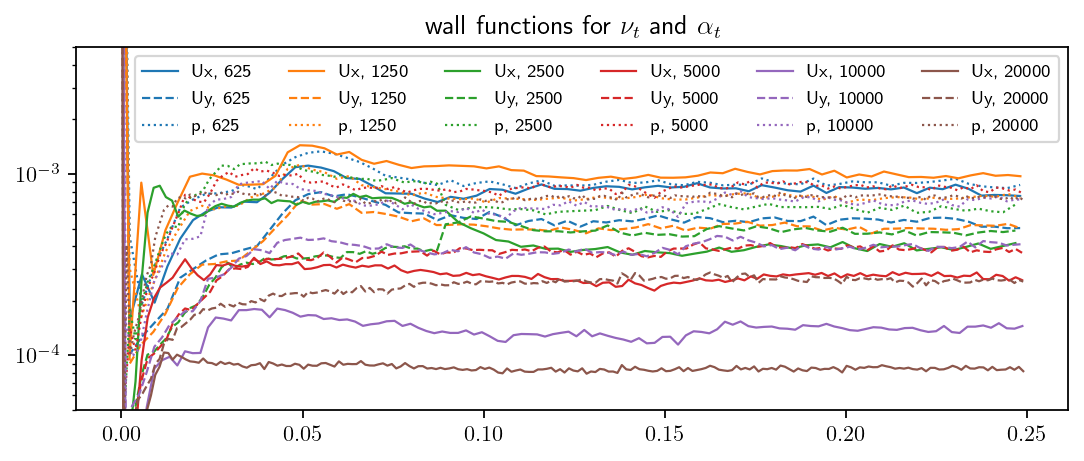

In [9]:
fig, ax = plt.subplots(1, 1, figsize=(8, 3), sharey=True)

lw = 1
colors = ["C{:d}".format(i) for i in range(len(wf_cases))]
every = 1000
for i, case in enumerate(wf_cases):
    path = run + case + "/postProcessing/solverInfo/0/solverInfo.dat"
    df = pd.read_csv(path, sep="\t", skiprows=[0, 1], names=names)
    ax.plot(df.t.values[::every], df.Uxi.values[::every], c=colors[i], ls="-", lw=lw, label="Ux, {:d}".format(625*2**i))
    ax.plot(df.t.values[::every], df.Uyi.values[::every], c=colors[i], ls="--", lw=lw, label="Uy, {:d}".format(625*2**i))
    ax.plot(df.t.values[::every], df.pi.values[::every], c=colors[i], ls=":", lw=lw, label="p, {:d}".format(625*2**i))

ax.set_ylim(5e-5, 5e-3)
ax.set_yscale("log")
ax.set_title(r"wall functions for $\nu_t$ and $\alpha_t$")
plt.legend(ncol=6, fontsize=8)
plt.savefig(output + "expansion_ratio_wf_res.pdf", bbox_inches="tight")
plt.show()

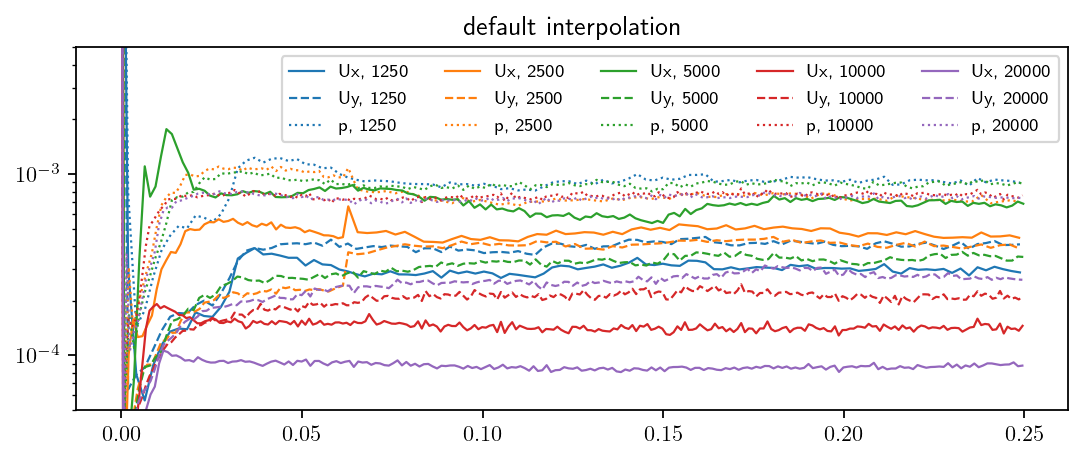

In [11]:
fig, ax = plt.subplots(1, 1, figsize=(8, 3), sharey=True)

lw = 1
colors = ["C{:d}".format(i) for i in range(len(df_cases))]
every = 1000
for i, case in enumerate(df_cases):
    path = run + case + "/postProcessing/solverInfo/0/solverInfo.dat"
    df = pd.read_csv(path, sep="\t", skiprows=[0, 1], names=names)
    ax.plot(df.t.values[::every], df.Uxi.values[::every], c=colors[i], ls="-", lw=lw, label="Ux, {:d}".format(1250*2**i))
    ax.plot(df.t.values[::every], df.Uyi.values[::every], c=colors[i], ls="--", lw=lw, label="Uy, {:d}".format(1250*2**i))
    ax.plot(df.t.values[::every], df.pi.values[::every], c=colors[i], ls=":", lw=lw, label="p, {:d}".format(1250*2**i))

ax.set_ylim(5e-5, 5e-3)
ax.set_yscale("log")
ax.set_title(r"default interpolation")
plt.legend(ncol=5, fontsize=8)
plt.savefig(output + "expansion_ratio_df_res.pdf", bbox_inches="tight")
plt.show()